#                                        Liver Disease prediction 
                                                

In [54]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline
accuracy3=float(1.2)

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
accuracy4=float(1.32)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
model4=float(1.2)

df = pd.read_csv ("C:\\Users\\tpree\\Downloads\\indian-liver-patient.csv")

In [55]:
df.shape

(583, 11)

In [56]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [57]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

Filtering categorical data

In [58]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numerical Features

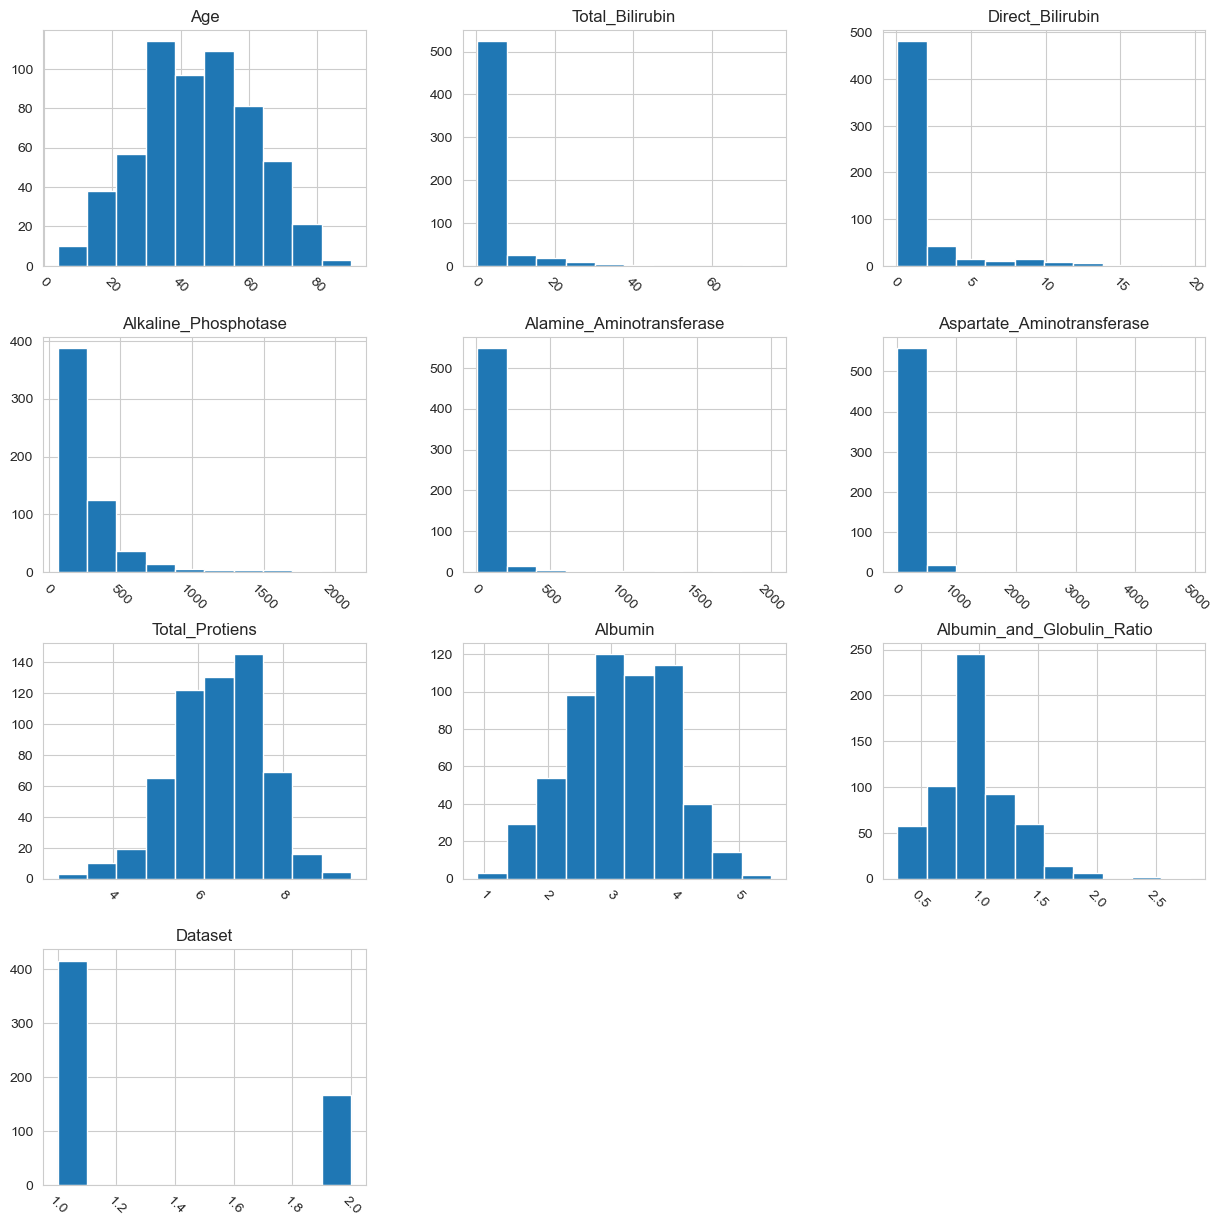

In [59]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [60]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [61]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [62]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


## Bar plots for categorical Features

<AxesSubplot:xlabel='count', ylabel='Gender'>

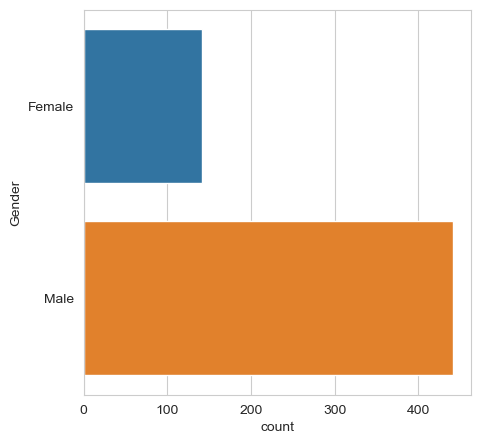

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [64]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


<AxesSubplot:xlabel='Gender', ylabel='count'>

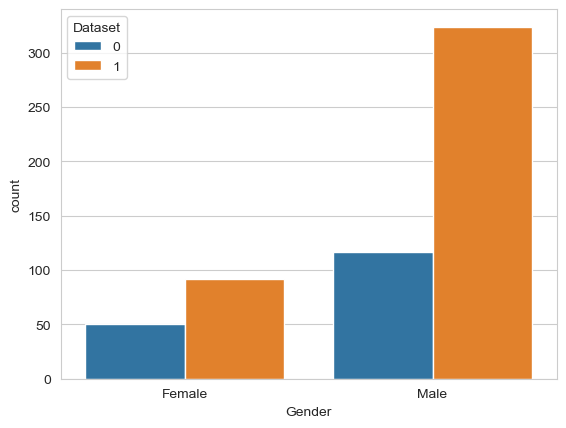

In [65]:
sns.countplot (x="Gender", hue="Dataset", data=df)

Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  441
Number of patients that are female:  142


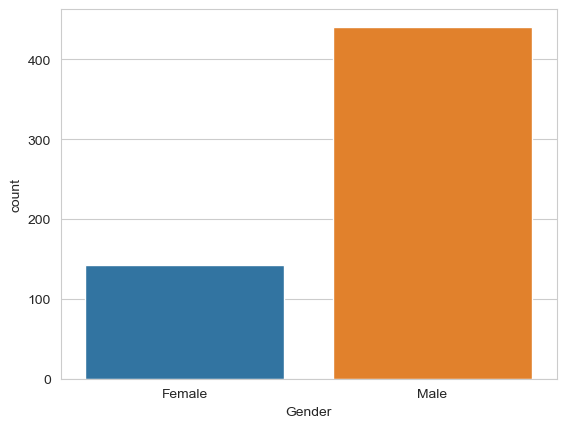

In [66]:
sns.countplot(data=df, x = 'Gender', label='Count')
accuracy1=float(1.1)
M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [67]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

#### 2-D Scatter Plot

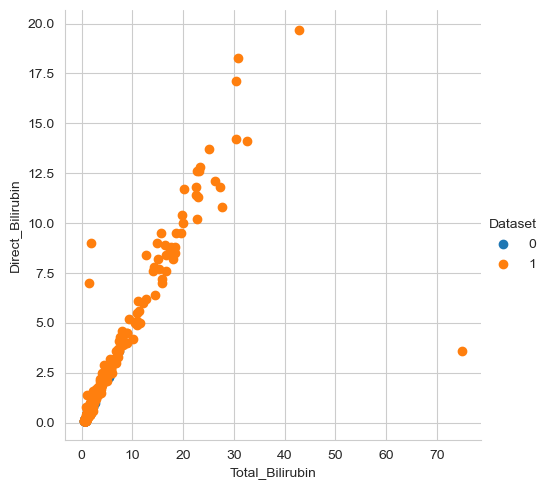

In [68]:
sns.set_style('whitegrid')   ## Background Grid
accuracy2=float(1.1)
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

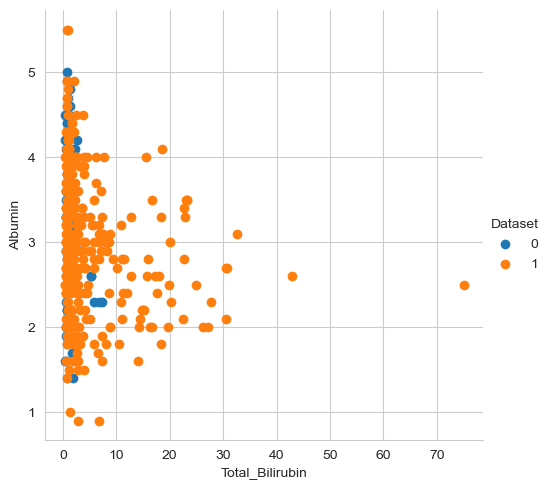

In [69]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

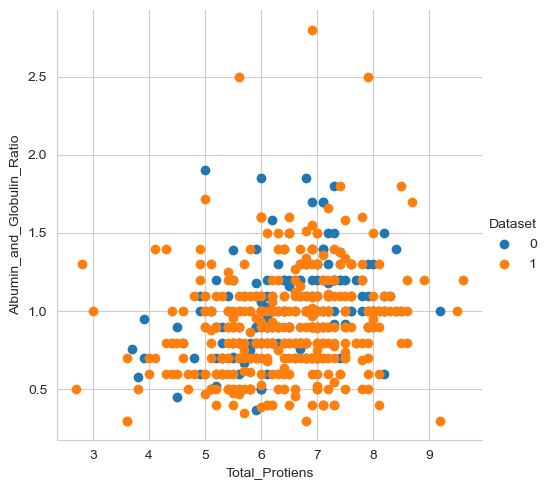

In [70]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

In [71]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<AxesSubplot:>

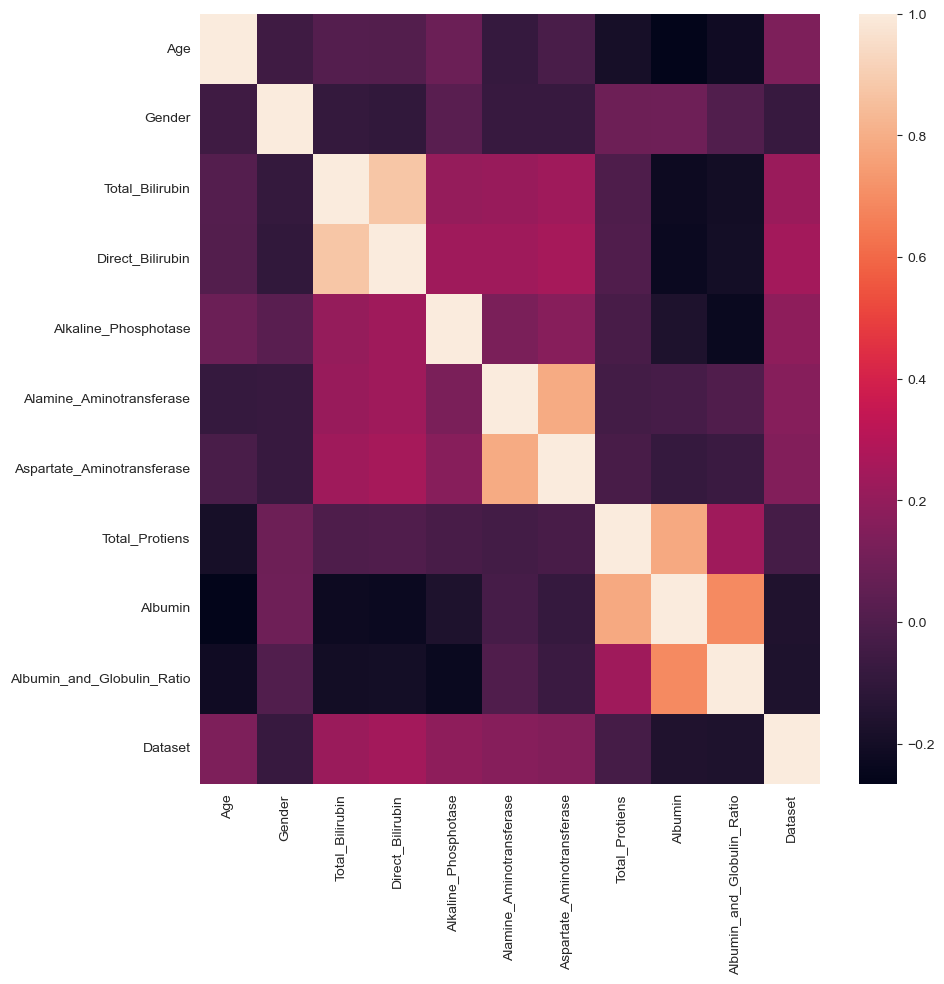

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

## Data Cleaning

In [73]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


There were 13 duplicates

## Removing Outliers

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

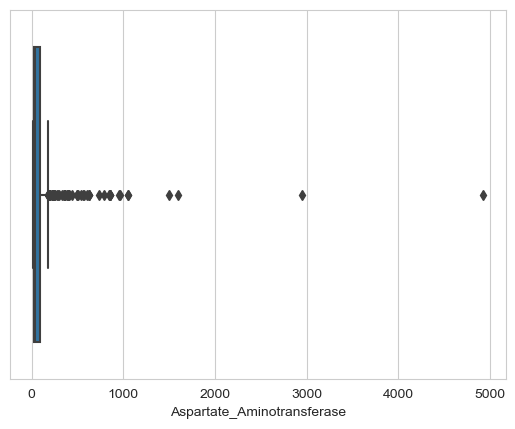

In [74]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [75]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [76]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

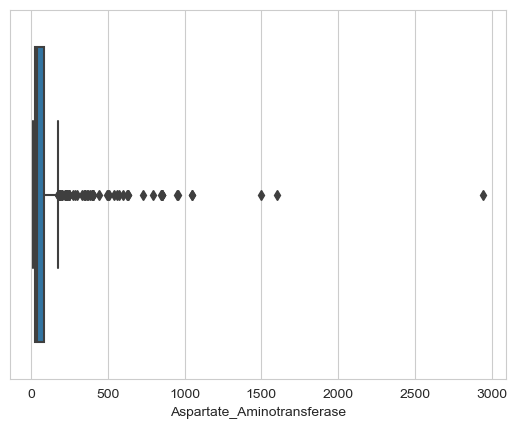

In [77]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [78]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [79]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [80]:
df.isnull().values.any()

True

In [81]:
df=df.dropna(how='any')  
#how : {‘any’, ‘all’}
#any : if any NA values are present, drop that label
#all : if all values are NA, drop that label

In [82]:
df.shape

(564, 11)

In [83]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [84]:
df = df.sample(frac=1).reset_index(drop=True)

In [85]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,6,0,0.6,0.1,289,38,30,4.8,2.0,0.70,0
1,50,0,1.1,0.3,175,20,19,7.1,4.5,1.70,0
2,55,0,0.6,0.2,220,24,32,5.1,2.4,0.88,1
3,60,0,5.8,3.0,257,107,104,6.6,3.5,1.12,1
4,45,0,2.2,0.8,209,25,20,8.0,4.0,1.00,1


### Data Preparation

In [86]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [87]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.Dataset)

In [88]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(451, 10) (113, 10) (451,) (113,)


In [89]:
from sklearn.preprocessing import minmax_scale

In [90]:
X_train=minmax_scale(X_train)
X_train

array([[0.70930233, 0.        , 0.02010724, ..., 0.14705882, 0.        ,
        0.12727273],
       [0.23255814, 0.        , 0.0080429 , ..., 0.76470588, 0.82926829,
        0.54545455],
       [0.1627907 , 1.        , 0.00536193, ..., 0.54411765, 0.51219512,
        0.39090909],
       ...,
       [0.44186047, 0.        , 0.00536193, ..., 0.57352941, 0.41463415,
        0.22727273],
       [0.65116279, 0.        , 0.11394102, ..., 0.58823529, 0.41463415,
        0.22727273],
       [0.22093023, 0.        , 0.0080429 , ..., 0.5       , 0.41463415,
        0.31818182]])

In [91]:
X_test=minmax_scale(X_test)
X_test

array([[0.63235294, 0.        , 0.29824561, ..., 0.5       , 0.35      ,
        0.12      ],
       [0.        , 0.        , 0.        , ..., 0.89655172, 0.825     ,
        0.32      ],
       [0.25      , 1.        , 0.01754386, ..., 0.81034483, 0.8       ,
        0.36      ],
       ...,
       [0.95588235, 0.        , 0.00438596, ..., 0.62068966, 0.575     ,
        0.28      ],
       [0.51470588, 0.        , 0.01315789, ..., 0.37931034, 0.45      ,
        0.36      ],
       [0.79411765, 0.        , 0.01315789, ..., 1.        , 0.85      ,
        0.28      ]])

#  Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
predict1=lr.predict(X_test)
predict1


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [94]:
model1=accuracy1*accuracy_score(y_test,predict1)
print(model1)

0.7982300884955753


# SVM

In [99]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [100]:
predict2=svclassifier.predict(X_test)
print(predict2)
model2=accuracy_score(y_test,predict2)
print(model2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.7168141592920354


In [103]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train,y_train)

predict3=nn.predict(X_test)
print(predict3)
#predict3
model3=accuracy3*accuracy_score(y_test,predict3)
print(model3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.8601769911504424


# Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=150)
random.fit(X_train, y_train)
predict4=nn.predict(X_test)
print(predict4)
#predict4
model4=accuracy4*accuracy_score(y_test,predict4)
print(model4)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.9461946902654867


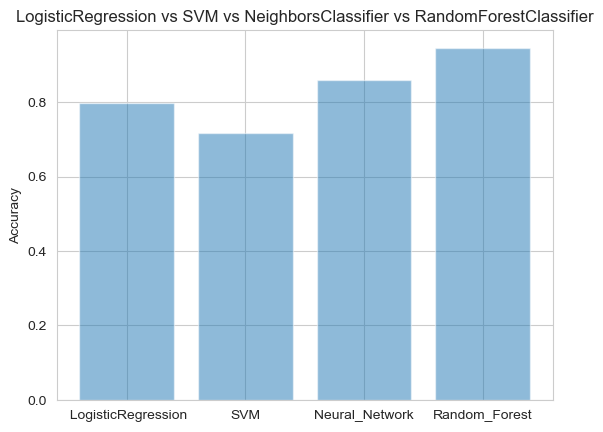

In [105]:
import matplotlib.pyplot as plt
objects = (' LogisticRegression','SVM','Neural_Network','Random_Forest')
y_pos = np.arange(len(objects))
performance = [model1,model2,model3,model4]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('LogisticRegression vs SVM vs NeighborsClassifier vs RandomForestClassifier')

plt.show()